# EDA and Prediction

Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

# IMPORT LIBRARIES

In [1]:
# import libraries and dependencies
import warnings
warnings.filterwarnings("ignore")

# data analysis and manipulation
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8
rcParams['text.color'] = 'white'

# import plotly.express as px
import matplotlib as mpl
mpl.rcParams['text.color'] = 'white'
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight') 
%matplotlib inline


# import modelling libraries
from sklearn.model_selection import (
            train_test_split, 
            TimeSeriesSplit,
            KFold, 
            StratifiedKFold, 
            GroupKFold, 
#             StratifiedGroupKFold,
        )

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.losses import binary_focal_crossentropy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## **Let us read the data file in the python notebook**

In [2]:
# read data
df = pd.read_csv("/kaggle/input/churn-dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
621,0516-UXRMT,Female,0,No,No,62,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,One year,Yes,Electronic check,92.05,5755.8,No
6343,0902-RFHOF,Male,0,No,No,38,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,730.1,No
2427,7854-FOKSF,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,35.90,35.9,Yes


In [3]:
# check number of columns and rows
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7043
Number of columns: 21


# **EXLORATORY DATA ANALYSIS.**

In [4]:
# check the columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#check unique values of the TotalCharges column
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us remove these 11 rows from our data set

In [9]:
#Removing missing values 
df.dropna(inplace = True)

In [10]:
# check for data description
df.describe(include='all')
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# sns.boxplot((df['Churn']))

In [12]:
# sns.distplot(df['Churn'])

In [13]:
# check unique columns on categorical variables
def unique_cols_value(df): 
    for col in df:
        if col != 'customerID':
            if df[col].dtypes == 'object':
                print(f'{col}: {df[col].unique()}')

In [14]:
unique_cols_value(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:
# replace the No internet service with no
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
df.replace('DSL', 'Yes', inplace=True)
df.replace('Fiber optic', 'Yes', inplace=True)

In [16]:
# print the unique values
unique_cols_value(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['Yes' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
#Remove customer IDs from the data set
df1 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df1['Churn'].replace('Yes', 1, inplace=True)
df1['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df1 = pd.get_dummies(df1)
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_No,InternetService_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [18]:
# check number of columns and rows of the encoded dataframe
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 7032
Number of columns: 38


In [19]:
df1.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
PaymentMethod_Electronic check             0.301455
InternetService_Yes                        0.227578
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
OnlineSecurity_No                          0.171270
TechSupport_No                             0.164716
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
OnlineBackup_No                            0.082307
DeviceProtection_No                        0.066193
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
PhoneService

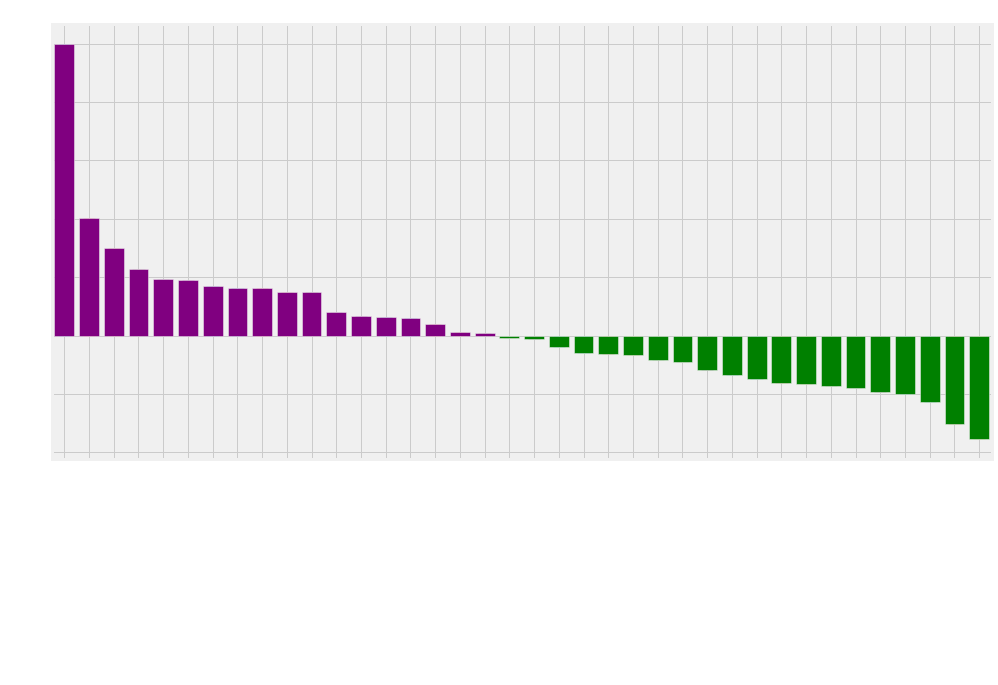

In [20]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

corr = df1.corr()['Churn'].sort_values(ascending = False)
bar_colors = ['purple' if c > 0 else 'green' for c in corr.values]  # Set colors based on value
plt.bar(corr.index, corr.values, color=bar_colors)
plt.xticks(rotation=90, ha='right', color='white')
plt.yticks(color='white')
plt.tick_params(axis='both', which='both', length=0)  # Hide tick marks
plt.ylabel('Correlation', color='white')
plt.title('Correlation of "Churn" with other variables', color='white')
plt.show()

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

## Data Exploration

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

**A.)** ***Demographics*** - Let us first understand the gender, age range, patner and dependent status of the customers

1. **Gender Distribution** - About half of the customers in our data set are male while the other half are female

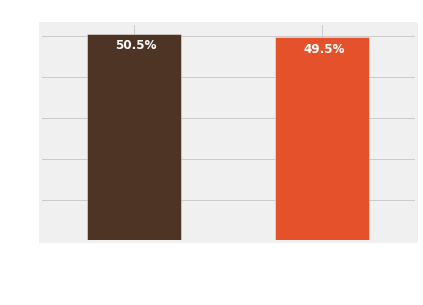

In [21]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts(normalize=True)*100.0).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', color='white')
ax.set_xlabel('Gender', color='white')
ax.set_title('Gender Distribution', color='white')

plt.xticks(rotation=90, ha='right', color='white')
plt.yticks(color='white')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


Text(0.5,1,'% of Senior Citizens')

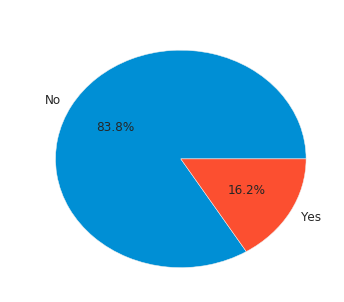

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12, color='white')
ax.set_title('% of Senior Citizens', fontsize = 12, color='white')

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

In [23]:
# df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
# df2 = df1.groupby(['variable','value']).count().unstack()
# df2 = df2*100/len(df)
# colors = ['#4D3425','#E4512B']
# ax = df2.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
#                                       figsize=(8,6),rot = 0,
#                                      width = 0.2)

# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('% Customers',size = 14)
# ax.set_xlabel('')
# ax.set_title('% Customers with dependents and partners',size = 14)
# ax.legend(loc = 'center',prop={'size':14})

# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
#                 color = 'white',
#                weight = 'bold',
#                size = 14)

**What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next. **

Interestingly,  among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. 
Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

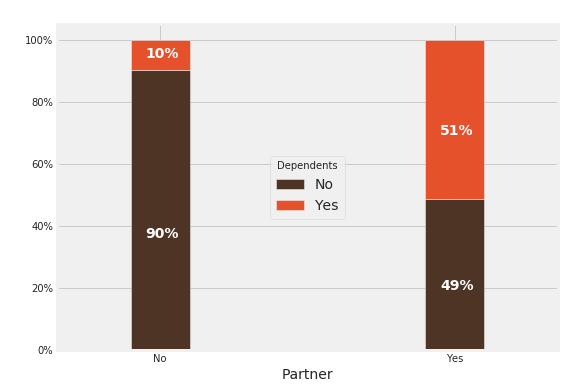

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14, color='white')
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14, color='white')
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

I also looked at any differences between the % of customers with/without dependents and partners by gender. There is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

### B.) **Customer Account Information**:  Let u now look at the tenure, contract

**1. Tenure:**  After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5,1,'# of Customers by their tenure')

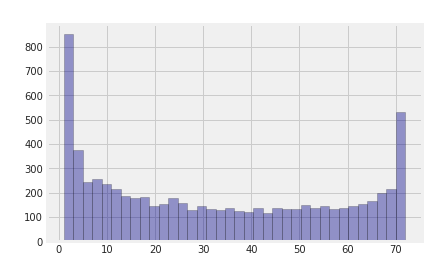

In [25]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers', color='white')
ax.set_xlabel('Tenure (months)', color='white')
ax.set_title('# of Customers by their tenure', color='white')

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

Text(0.5,1,'# of Customers by Contract Type')

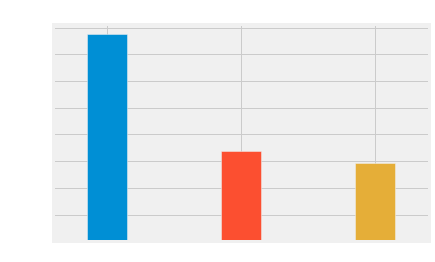

In [26]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers', color='white')
plt.yticks(color='white')
plt.xticks(rotation=0, ha='center', color='white')
ax.set_title('# of Customers by Contract Type', color='white')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.



Below we will understand the tenure of customers based on their contract type.

Text(0.5,1,'Two Year Contract')

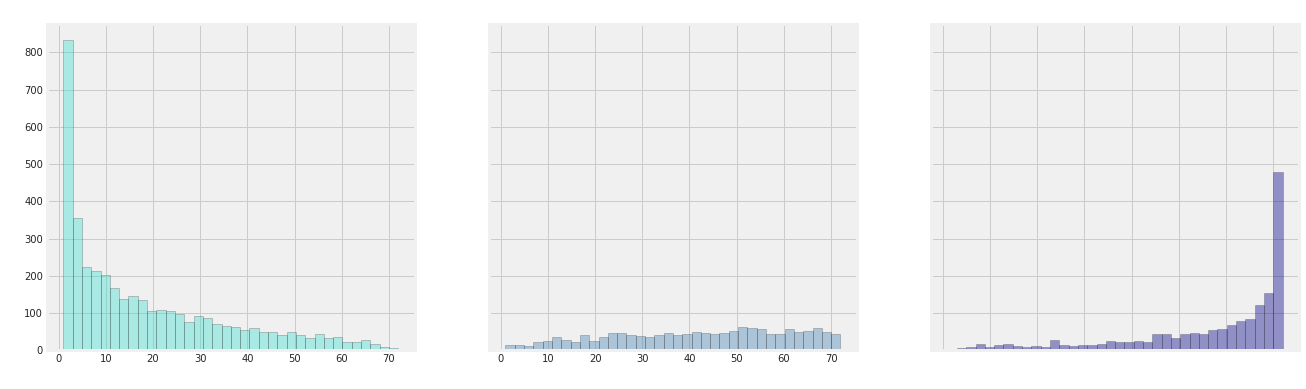

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, sharex = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers', color='white')
ax.set_xlabel('Tenure (months)', color='white')
plt.xticks(rotation=0, ha='center', color='white')
ax.set_title('Month to Month Contract', color='white')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14, color='white')
ax.set_title('One Year Contract',size = 14, color='white')

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)', color='white')
ax.set_title('Two Year Contract', color='white')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

This is also what we saw in the earlier chart on correlation with the churn rate. 

###  C. Let us now look at the distribution of various services used by customers

In [28]:
df.columns.values
# df.columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

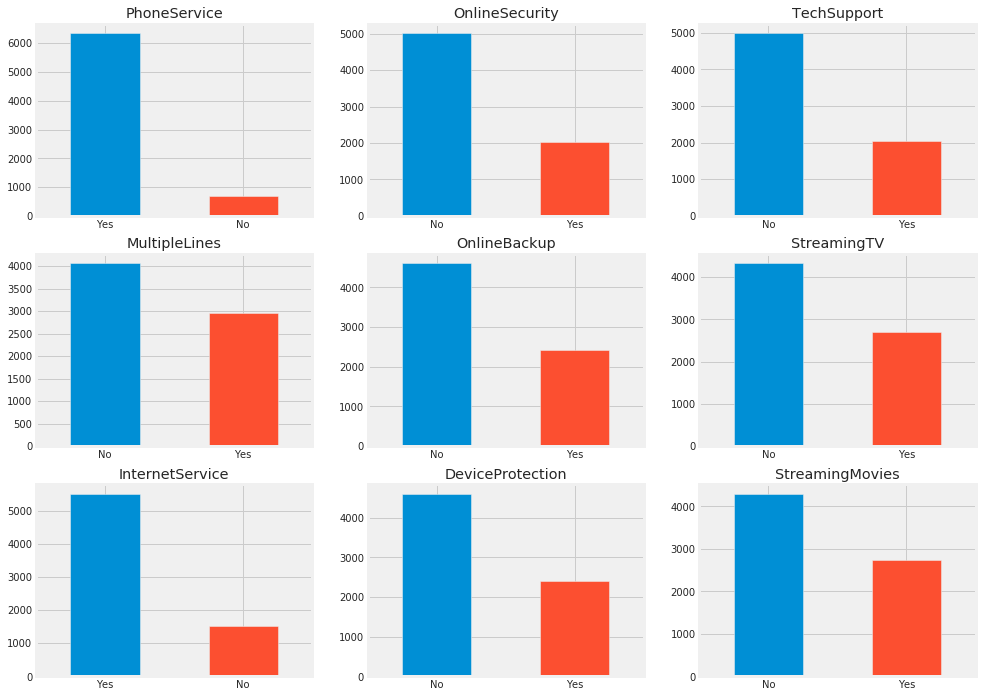

In [29]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
#         plt.xticks(rotation=0, ha='center', color='white')
#         plt.xticks(color='white')
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

### D.) Now let's take a quick look at the relation between monthly and total charges

We will observe that the total charges increases as the monthly bill for a customer increases.

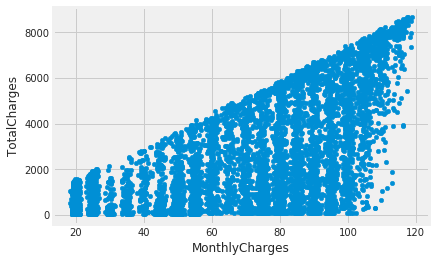

In [30]:
df1[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

### E.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot. 

1. Lets first look at the churn rate in our data

In [31]:
# colors = ['#4D3425','#E4512B']
# ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
#                                                                            stacked = True,
#                                                                           rot = 0,
#                                                                           color = colors,
#                                                                          figsize = (8,6))
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('% Customers',size = 14)
# ax.set_xlabel('Churn',size = 14)
# ax.set_title('Churn Rate', size = 14)

# # create a list to collect the plt.patches data
# totals = []

# # find the values and append to list
# for i in ax.patches:
#     totals.append(i.get_width())

# # set individual bar lables using above list
# total = sum(totals)

# for i in ax.patches:
#     # get_width pulls left or right; get_y pushes up or down
#     ax.text(i.get_x()+.15, i.get_height()-4.0, \
#             str(round((i.get_height()/total), 1))+'%',
#             fontsize=12,
#             color='white',
#            weight = 'bold',
#            size = 14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

2. Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

**i.) Churn vs Tenure**: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company. 

In [32]:
# sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

**ii.) Churn by Contract Type**: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

In [33]:
colors = ['#4D3425','#E4512B']
# contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

# ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
#                                                                 width = 0.3,
#                                                                 stacked = True,
#                                                                 rot = 0, 
#                                                                 figsize = (10,6),
#                                                                 color = colors)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='best',prop={'size':14},title = 'Churn')
# ax.set_ylabel('% Customers',size = 14)
# ax.set_title('Churn by Contract Type',size = 14)

# # Code to add the data labels on the stacked bar chart
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
#                 color = 'white',
#                weight = 'bold',
#                size = 14)

**iii.) Churn by Seniority**: Senior Citizens have almost double the churn rate than younger population.

In [34]:
# colors = ['#4D3425','#E4512B']
# seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

# ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
#                                                                 width = 0.2,
#                                                                 stacked = True,
#                                                                 rot = 0, 
#                                                                 figsize = (8,6),
#                                                                 color = colors)
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.legend(loc='center',prop={'size':14},title = 'Churn')
# ax.set_ylabel('% Customers')
# ax.set_title('Churn by Seniority Level',size = 14)

# # Code to add the data labels on the stacked bar chart
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
#                 color = 'white',
#                weight = 'bold',size =14)

**iv.) Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

In [35]:
# ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
#                 color="Red", shade = True)
# ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
#                 ax =ax, color="Blue", shade= True)
# ax.legend(["Not Churn","Churn"],loc='upper right')
# ax.set_ylabel('Density')
# ax.set_xlabel('Monthly Charges')
# ax.set_title('Distribution of monthly charges by churn')

**v.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

In [36]:
# ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
#                 color="Red", shade = True)
# ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
#                 ax =ax, color="Blue", shade= True)
# ax.legend(["Not Churn","Churn"],loc='upper right')
# ax.set_ylabel('Density')
# ax.set_xlabel('Total Charges')
# ax.set_title('Distribution of total charges by churn')

## After going through the above EDA we will develop some predictive models and compare them.

We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

In [37]:
df1.sample(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_No,InternetService_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1868,0,1,44.05,44.05,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0
2869,0,6,91.10,455.30,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0
5738,0,1,20.60,20.60,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [38]:
# df1['PaymentMethod_Mailed check'].dtype

In [39]:
# scale the data
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

df1.sample(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_No,InternetService_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
176,1,0.197183,0.559204,0.130037,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4546,0,0.154930,0.659204,0.103635,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
3298,0,0.042254,0.017910,0.007443,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
4465,0,0.422535,0.316418,0.173621,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0
2325,0,0.042254,0.016915,0.007397,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
300,0,0.309859,0.464179,0.172052,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0
4340,0,0.056338,0.302488,0.024971,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0
6815,0,1.000000,0.513433,0.586609,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0
6877,0,0.000000,0.511940,0.005874,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
6845,1,0.000000,0.274627,0.003121,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [40]:
# recheck unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

SeniorCitizen: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
MonthlyCharges: [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.25820896 0.60149254]
TotalCharges: [0.0012751  0.21586661 0.01031041 ... 0.03780868 0.03321025 0.7876

In [41]:
# X.info()

In [42]:
# independent and dependent variables
X = df1.drop('Churn', axis=1)
y = df1['Churn']

In [43]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=24, sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [44]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=101, stratify=y_sm)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7228, 37), (3098, 37), (7228,), (3098,))

In [46]:
# !pip install imblearn

In [47]:
# len(X_train_resampled)

In [48]:
# from sklearn.ensemble import RandomForestClassifier

# from xgboost import XGBClassifier

# Train XGBoost classifier
# xgb_model = XGBClassifier(scale_pos_weight=3, random_state=22)
# xgb_model.fit(X_train, y_train)

# Use the XGBoost model to generate predictions on the training and test set
# train_xgb_preds = xgb_model.predict_proba(X_train)
# test_xgb_preds = xgb_model.predict_proba(X_test)

# Concatenate the XGBoost predictions with the original features
# train_X_ANN = np.concatenate((X_train_resampled, train_xgb_preds.reshape(-1, 1)), axis=1)
# test_X_ANN = np.concatenate((X_test, test_xgb_preds.reshape(-1, 1)), axis=1)

In [49]:
# Define the ANN model architecture
# input_shape = train_X_ANN.shape[1]

In [50]:
# Train ANN on second-level training set
# ann_model = keras.Sequential([
#     layers.Dense(128, input_shape=(39,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     layers.Dropout(0.5),
#     layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     layers.Dropout(0.5),
#     layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001))
# ])
# ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train_data = np.hstack((X_train, train_xgb_preds))
# test_data = np.hstack((X_test, test_xgb_preds))

# # fit your model to the data
# ann_model.fit(train_data, y_train, epochs=100, batch_size=64)

In [51]:
# Generate predictions for the test set
# test_preds = ann_model.predict_classes(test_data)

# Print the classification report
# print(classification_report(y_test, test_preds))

In [52]:
# Train a Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

In [53]:
# Use the Random Forest model to generate features
# train_rf = rf.predict_proba(X_train)
# test_rf = rf.predict_proba(X_test)

In [54]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks to use during training
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# model_checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

# create a neural network
model = keras.Sequential([
    
    layers.Dense(128, input_shape=(37,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001))

    
])


# compile layer
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# train_data = np.hstack((X_train, train_rf))
# test_data = np.hstack((X_test, test_rf))

# # fit your model to the data
model.fit(
            X_train, y_train, 
            epochs=100, 
            batch_size=64, 
            class_weight={0: 1.0, 1: 2.0},
            validation_data=(X_test, y_test),
#             callbacks=[early_stopping, model_checkpoint]
)

Train on 7228 samples, validate on 3098 samples
Epoch 1/100
7228/7228 [==============================] - 1s 117us/step - loss: 0.6710 - acc: 0.6583 - val_loss: 0.6259 - val_acc: 0.7476
Epoch 2/100
7228/7228 [==============================] - 0s 34us/step - loss: 0.5719 - acc: 0.7424 - val_loss: 0.6100 - val_acc: 0.7418
Epoch 3/100
7228/7228 [==============================] - 0s 38us/step - loss: 0.5500 - acc: 0.7428 - val_loss: 0.5884 - val_acc: 0.7434
Epoch 4/100
7228/7228 [==============================] - 0s 34us/step - loss: 0.5283 - acc: 0.7479 - val_loss: 0.5664 - val_acc: 0.7556
Epoch 5/100
7228/7228 [==============================] - 0s 33us/step - loss: 0.5187 - acc: 0.7478 - val_loss: 0.5707 - val_acc: 0.7492
Epoch 6/100
7228/7228 [==============================] - 0s 32us/step - loss: 0.5093 - acc: 0.7429 - val_loss: 0.5757 - val_acc: 0.7456
Epoch 7/100
7228/7228 [==============================] - 0s 33us/step - loss: 0.4994 - acc: 0.7453 - val_loss: 0.5510 - val_acc: 0.7498

In [55]:
# evaluate the model
model.evaluate(X_test, y_test)

3098/3098 [==============================] - 0s 21us/step


[0.5124486039691467, 0.7708198838344769]

In [56]:
# Evaluate the model
# y_pred = model.predict_classes(test_data)

In [57]:
# do predictions
yp = model.predict(X_test)
yp[:5]

array([[0.90736586],
       [0.9321787 ],
       [0.9106609 ],
       [0.15432493],
       [0.6451134 ]], dtype=float32)

In [58]:
# convert the above predictions to whole numbers
y_pred = (yp > 0.5).astype(int)

In [59]:
print(y_pred[:10]) 
print()
print(y_test[:10])

[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]

[1 1 1 0 1 1 1 0 0 1]


In [60]:
# model.predict([])

In [61]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.91      0.60      0.73      1549
           1       0.70      0.94      0.80      1549

   micro avg       0.77      0.77      0.77      3098
   macro avg       0.80      0.77      0.76      3098
weighted avg       0.80      0.77      0.76      3098



Text(40.1,0.5,'Truth')

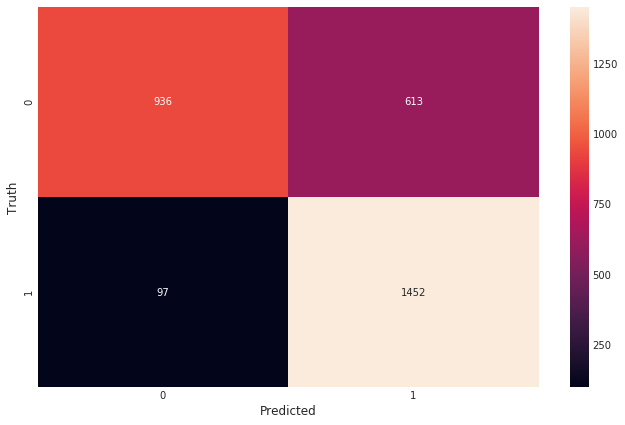

In [62]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
# Running logistic regression model
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# result = model.fit(X_train, y_train)

In [64]:
# from sklearn import metrics
# prediction_test = model.predict(X_test)
# Print the prediction accuracy
# print (metrics.accuracy_score(y_test, prediction_test))

In [65]:
# To get the weights of all the variables
# weights = pd.Series(model.coef_[0],
#                  index=X.columns.values)
# print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


In [66]:
# print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:
* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Having DSL internet service also reduces the proability of Churn
* Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are  likely to churn because of it. I think we need to explore more to better understad why this is happening. 

Any hypothesis on the above would be really helpful! 

**2. Random Forest**

In [67]:
# from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
#                                   random_state =50, max_features = "auto",
#                                   max_leaf_nodes = 30)
# model_rf.fit(X_train, y_train)

# # Make predictions
# prediction_test = model_rf.predict(X_test)
# print (metrics.accuracy_score(y_test, prediction_test))

In [68]:
# importances = model_rf.feature_importances_
# weights = pd.Series(importances,
#                  index=X.columns.values)
# weights.sort_values()[-10:].plot(kind = 'barh')

**Observations:**

* From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
* The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

**3. Support Vecor Machine (SVM)**

In [69]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [70]:
# from sklearn.svm import SVC

# model.svm = SVC(kernel='linear') 
# model.svm.fit(X_train,y_train)
# preds = model.svm.predict(X_test)
# metrics.accuracy_score(y_test, preds)

In [71]:
# Create the Confusion matrix
# from sklearn.metrics import classification_report, confusion_matrix  
# print(classification_report(y_test,preds))  

Wth SVM I was able to increase the accuracy to upto 82%. However, we need to take a deeper look at the true positive and true negative rates, including the Area Under the Curve (AUC) for a better prediction. I will explore this soon. Stay Tuned!

In [72]:
# ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
#                   estimator=lambda x: sum(x==0)*100.0/len(x))
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

**4. ADA Boost**

In [73]:
# # AdaBoost Algorithm
# from sklearn.ensemble import AdaBoostClassifier
# model = AdaBoostClassifier()
# # n_estimators = 50 (default value) 
# # base_estimator = DecisionTreeClassifier (default value)
# model.fit(X_train,y_train)
# preds = model.predict(X_test)
# metrics.accuracy_score(y_test, preds)

**5. XG Boost**

In [74]:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X_train, y_train)
# preds = model.predict(X_test)
# metrics.accuracy_score(y_test, preds)

Interestingly with XG Boost I was able to increase the accuracy on test data to almost 83%. Clearly, XG Boost is a winner among all other techniques. XG Boost is a slow learning model and is based on the concept of Boosting

In [75]:
# pd.options.display.max_rows = 2200
#define a function to create variable importance dataframe
# def get_catt_varimp(model, df1_columns, max_vars=350):
    
    # Scikit-learn API LGBMClassifier or LGBMRegressor was fitted, 
    # so using feature_importances_ property
#     feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
#     cv_varimp_df = pd.DataFrame([df1.columns, feature_importances_perc]).T

#     cv_varimp_df.columns = ['feature_name', 'varimp (%)']

#     cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)

#     cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   

#     return cv_varimp_df
# #
# get_catt_varimp(model, X.columns)

In [76]:
model.save('final_model3.h5')